In [1]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_feather('train.feather')
test=pd.read_feather('test.feather')

In [4]:
labels=pd.read_csv('train_labels.csv')

In [5]:
data=pd.merge(train,labels,on='customer_ID')

In [6]:
data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983,0


<Axes: xlabel='target', ylabel='count'>

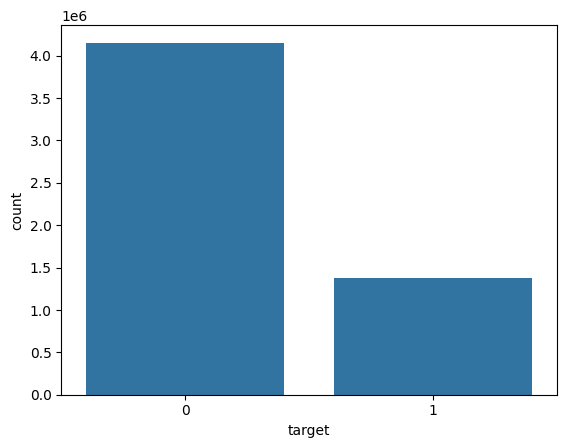

In [7]:
import seaborn as sns
sns.countplot(x='target',data=data)

In [8]:
data['customer_ID'].nunique()

458913

In [9]:
import matplotlib.pyplot as plt

In [10]:
train_ids = set(data['customer_ID'].unique())
test_ids = set(test['customer_ID'].unique())
only_train = len(train_ids - test_ids)
only_test = len(test_ids - train_ids)
common = len(train_ids & test_ids)

In [11]:
categories = ['Only in Train', 'Only in Test', 'In Both']
counts = [only_train, only_test, common]

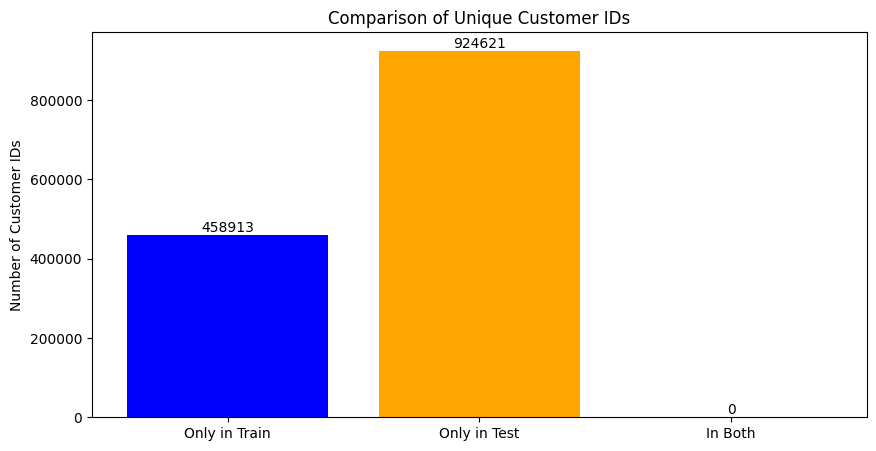

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(categories, counts, color=['blue', 'orange', 'green'])
ax.set_title('Comparison of Unique Customer IDs')
ax.set_ylabel('Number of Customer IDs')
for i, count in enumerate(counts):
    ax.text(i, count + 100, str(count), ha='center', va='bottom')
plt.show()

Non of user intersect in train and test data

In [13]:
train['S_2']=pd.to_datetime(train['S_2'])
test['S_2']=pd.to_datetime(test['S_2'])

In [14]:
print('Training timeline')
train['S_2'].min(), train['S_2'].max()

Training timeline


(Timestamp('2017-03-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [15]:
print('Testing timeline')
test['S_2'].min(), test['S_2'].max()

Testing timeline


(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-10-31 00:00:00'))

In [16]:
cols = train.columns[train.isnull().sum() < 0.6*len(train)]

In [17]:
cols

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_130', 'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=166)

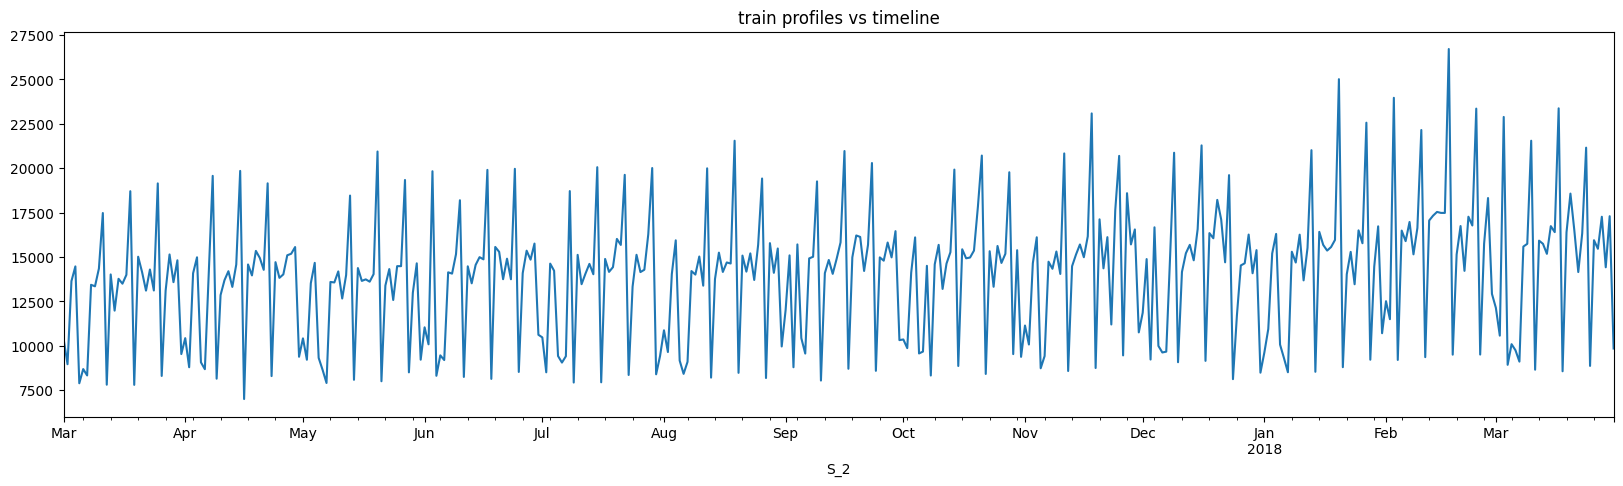

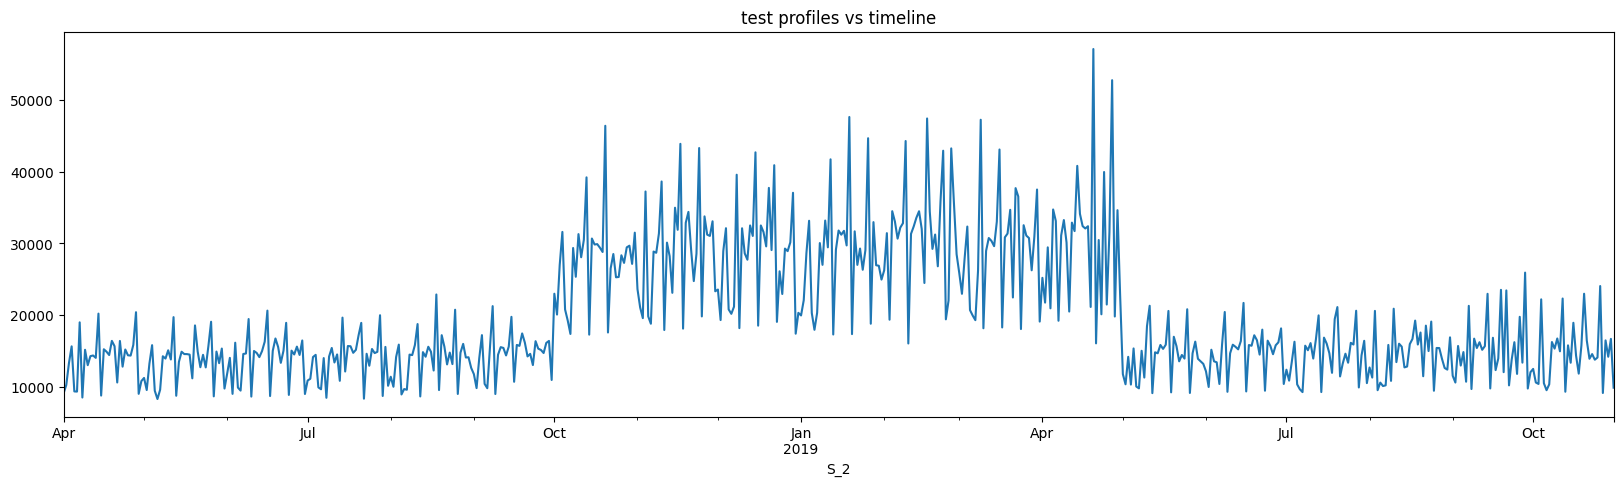

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
train.groupby("S_2")['customer_ID'].count().plot()
plt.title("train profiles vs timeline")
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
test.groupby("S_2")['customer_ID'].count().plot()
plt.title("test profiles vs timeline")
plt.show()

Train data are consistent

In Test data there is a increase shown in oct to apr

In [19]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827


In [20]:
train=train[cols]

In [21]:
train=train.groupby('customer_ID').tail(1).reset_index(drop=True)
test=test.groupby('customer_ID').tail(1).reset_index(drop=True)

In [22]:
train_df = train.merge(labels, on='customer_ID', how='left')

In [23]:
train_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,0.005703,0.006210,0.002716,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,0.001928,0.002996,0.001701,0.002981,0.007481,0.007874,0.003284,0.003170,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,0.003469,0.009880,0.007690,0.007381,0.006622,0.000965,0.002201,0.000834,0.003445,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,...,0.004578,0.001789,0.005138,0.002705,0.006184,0.001899,0.008186,0.005558,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,...,0.008896,0.005047,0.003706,0.002974,0.004162,0.005764,0.008156,0.006943,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-03-31,0.844238,0.447510,0.028519,1.009766,0.001928,0.128662,0.003483,0.005894,...,0.009491,0.002071,0.004589,0.007919,0.001519,0.005531,0.001431,0.003010,0.004845,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2018-03-22,0.831055,0.033661,0.292480,0.055664,0.006954,NaN,0.005791,0.233032,...,1.005859,1.128906,0.004883,0.004395,0.006184,0.001479,0.004795,0.009232,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800293,0.267090,0.020569,1.006836,0.000957,0.066650,0.007423,0.006313,...,0.003281,0.004513,0.008926,0.006035,0.002869,0.002150,0.008034,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.753906,0.008621,0.015839,0.714355,0.000993,0.408936,0.003391,0.050049,...,0.002680,0.000479,0.006828,1.009766,0.004478,0.949707,1.009766,0.002502,0.185547,1


In [24]:
for i in train_df.columns:
    if train_df[i].dtypes=='object':
        print(i)

customer_ID


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 167 entries, customer_ID to target
dtypes: datetime64[ns](1), float16(153), int64(1), int8(11), object(1)
memory usage: 149.2+ MB


In [26]:
drop_cols = ['customer_ID', 'S_2', 'target']
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
train_cols = [col for col in train_df.columns if col not in drop_cols]

In [27]:
from tqdm import tqdm

In [28]:
def calculate_iv(feature, target, bins=10):
    df = pd.DataFrame({"feature": feature, "target": target})
    if np.issubdtype(feature.dtype, np.number):
        df["feature"] = df["feature"].astype(np.float32)
        df["bin"] = pd.qcut(df["feature"], bins, duplicates="drop")
    else:
        df["bin"] = df["feature"]
    bin_df = df.groupby("bin")["target"].agg(["count", "sum"])
    bin_df.columns = ["total", "bad"]
    bin_df["good"] = bin_df["total"] - bin_df["bad"]
    total_good = bin_df["good"].sum()
    total_bad = bin_df["bad"].sum()
    bin_df["woe"] = np.log((bin_df["good"] / total_good) / (bin_df["bad"] / total_bad))
    bin_df["iv"] = (bin_df["good"] / total_good - bin_df["bad"] / total_bad) * bin_df["woe"]
    
    iv = bin_df["iv"].sum()
    return iv

iv_score_dict = {}
for col in tqdm(train_cols):
    iv_score_dict[col] = calculate_iv(train_df[col], train_df['target'])

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

print(iv_score_df)

  0%|          | 0/164 [00:00<?, ?it/s]C:\Users\Asus\AppData\Local\Temp\ipykernel_16712\1211862322.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_df = df.groupby("bin")["target"].agg(["count", "sum"])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16712\1211862322.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_df = df.groupby("bin")["target"].agg(["count", "sum"])
  1%|          | 2/164 [00:00<00:11, 13.98it/s]C:\Users\Asus\AppData\Local\Temp\ipykernel_16712\1211862322.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

P_2      3.683543
D_48     2.526942
B_18     2.130578
D_61     2.093491
B_7      2.090075
           ...   
R_18     0.000111
S_18     0.000050
D_126    0.000000
B_31     0.000000
D_66     0.000000
Length: 164, dtype: float64


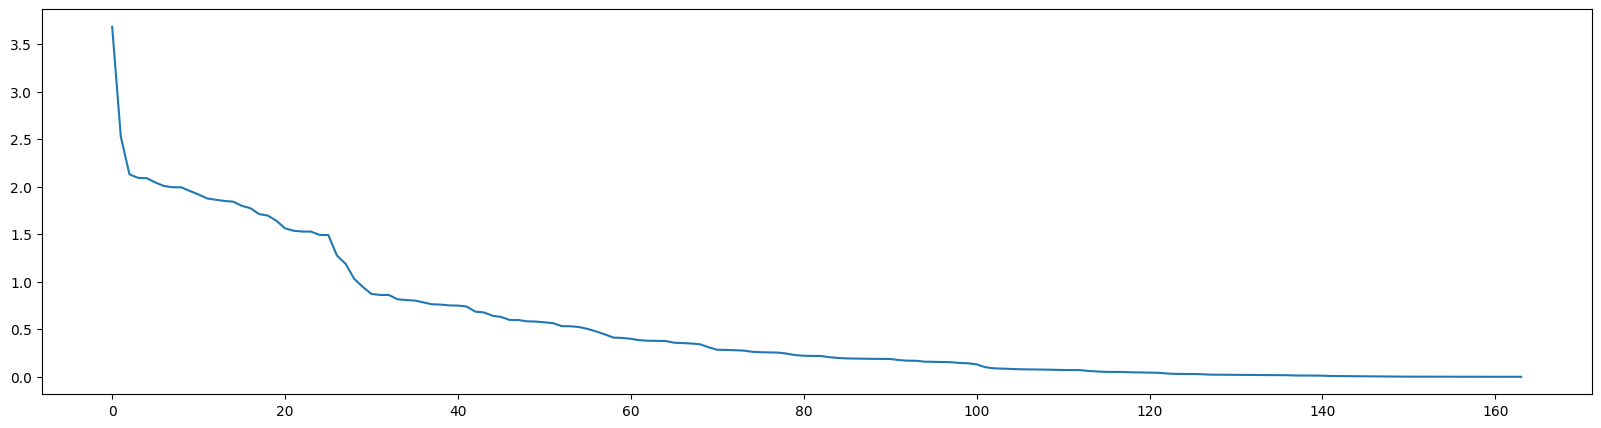

In [29]:
fig, ax = plt.subplots(figsize=(20,5))
iv_score_df.reset_index(drop=True).plot()
plt.show()

In [30]:
selected_features = iv_score_df[iv_score_df > 0.5].index.values
cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in train_df.columns if col in selected_features]

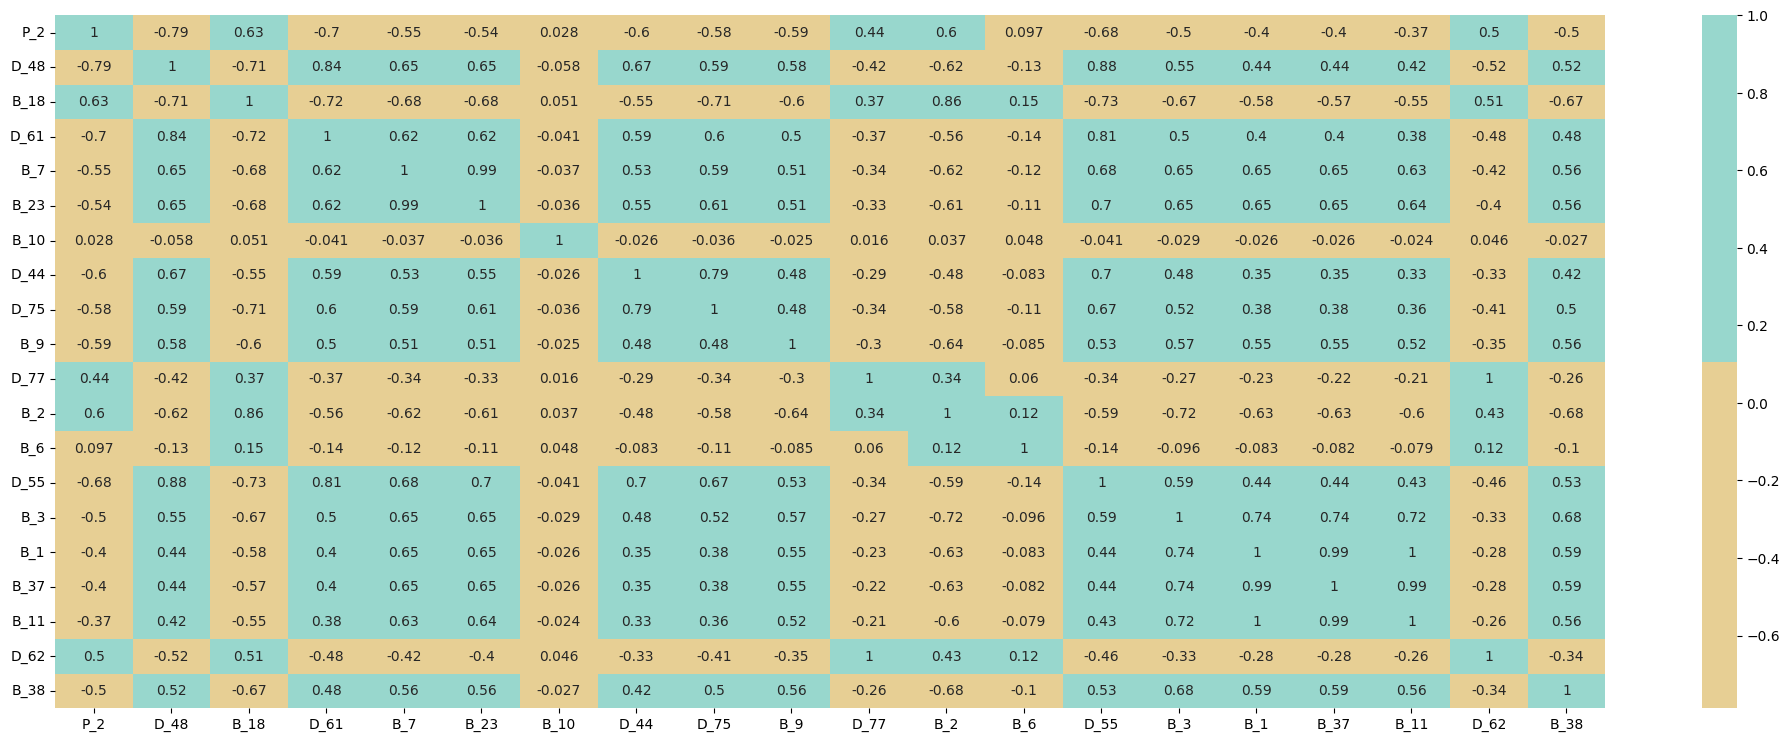

In [31]:
top_cols = [col for col in selected_features[:20] if col in train_cols]
corr_df = train_df[top_cols].corr()
plt.figure(figsize=(25, 9))
sns.heatmap(corr_df,annot=True ,cmap=sns.color_palette("BrBG",2));
plt.show()

In [32]:
def drop_feature_selection(row, col, corr, row_iv, col_iv):
    if row_iv >= col_iv:
        return col
    else:
        return row

In [33]:
cor_matrix = train_df[train_cols].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.8")
corr_df['row_iv'] = corr_df['row'].map(iv_score_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_score_dict)

corr_df['drop_feature'] = corr_df.apply(lambda x: drop_feature_selection(x['row'], x['col'], x['corr'], x['row_iv'], x['col_iv']), axis=1)

In [34]:
corr_df

,row,col,corr,row_iv,col_iv,drop_feature
1250,D_62,D_77,0.999824,1.697134,1.918073,D_62
130,B_1,B_11,0.995629,1.799211,1.711657,B_11
782,B_7,B_23,0.994963,2.090075,2.044909,B_23
158,B_1,B_37,0.992982,1.799211,1.773870,B_37
1420,D_74,D_75,0.988533,1.528029,1.993777,D_74
1071,B_11,B_37,0.988209,1.711657,1.773870,B_11
1513,S_22,S_24,0.965077,0.782551,0.642091,S_24
1147,D_58,D_75,0.927898,1.492869,1.993777,D_58
1146,D_58,D_74,0.923637,1.492869,1.528029,D_58
205,B_2,B_33,0.918636,1.876917,1.491216,B_33


In [35]:
corr_drop_features = corr_df['drop_feature'].unique().tolist()

In [36]:
corr_drop_features

['D_62',
 'B_11',
 'B_23',
 'B_37',
 'D_74',
 'S_24',
 'D_58',
 'B_33',
 'S_7',
 'B_16',
 'D_55',
 'B_2',
 'D_61']

In [37]:
train_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,0.005703,0.006210,0.002716,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,0.001928,0.002996,0.001701,0.002981,0.007481,0.007874,0.003284,0.003170,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,0.003469,0.009880,0.007690,0.007381,0.006622,0.000965,0.002201,0.000834,0.003445,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,...,0.004578,0.001789,0.005138,0.002705,0.006184,0.001899,0.008186,0.005558,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,...,0.008896,0.005047,0.003706,0.002974,0.004162,0.005764,0.008156,0.006943,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-03-31,0.844238,0.447510,0.028519,1.009766,0.001928,0.128662,0.003483,0.005894,...,0.009491,0.002071,0.004589,0.007919,0.001519,0.005531,0.001431,0.003010,0.004845,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2018-03-22,0.831055,0.033661,0.292480,0.055664,0.006954,NaN,0.005791,0.233032,...,1.005859,1.128906,0.004883,0.004395,0.006184,0.001479,0.004795,0.009232,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800293,0.267090,0.020569,1.006836,0.000957,0.066650,0.007423,0.006313,...,0.003281,0.004513,0.008926,0.006035,0.002869,0.002150,0.008034,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.753906,0.008621,0.015839,0.714355,0.000993,0.408936,0.003391,0.050049,...,0.002680,0.000479,0.006828,1.009766,0.004478,0.949707,1.009766,0.002502,0.185547,1


In [38]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [39]:
train_data, test_data = model_selection.train_test_split(train_df, test_size=0.3, random_state=42, shuffle=True, stratify=train_df['target'])


In [40]:
selected_features = [col for col in selected_features if col not in corr_drop_features]
cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in train_df.columns if col in selected_features]

In [41]:
target_col='target'

In [42]:
X_train = train_data[train_cols].copy()
y_train = train_data[target_col].copy()

X_vtest = test_data[train_cols].copy()
y_vtest = test_data[target_col].copy()

X_test = test[train_cols].copy()

In [59]:
import xgboost as xgb

estimator = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
estimator.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [60]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [61]:
y_pred = estimator.predict(X_vtest)
y_pred_proba = estimator.predict_proba(X_vtest)[:, 1]

In [62]:
accuracy = accuracy_score(y_vtest, y_pred)
roc_auc = roc_auc_score(y_vtest, y_pred_proba)
conf_matrix = confusion_matrix(y_vtest, y_pred)
class_report = classification_report(y_vtest, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8941
ROC AUC: 0.9551
Confusion Matrix:
[[94966  7060]
 [ 7523 28125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    102026
           1       0.80      0.79      0.79     35648

    accuracy                           0.89    137674
   macro avg       0.86      0.86      0.86    137674
weighted avg       0.89      0.89      0.89    137674



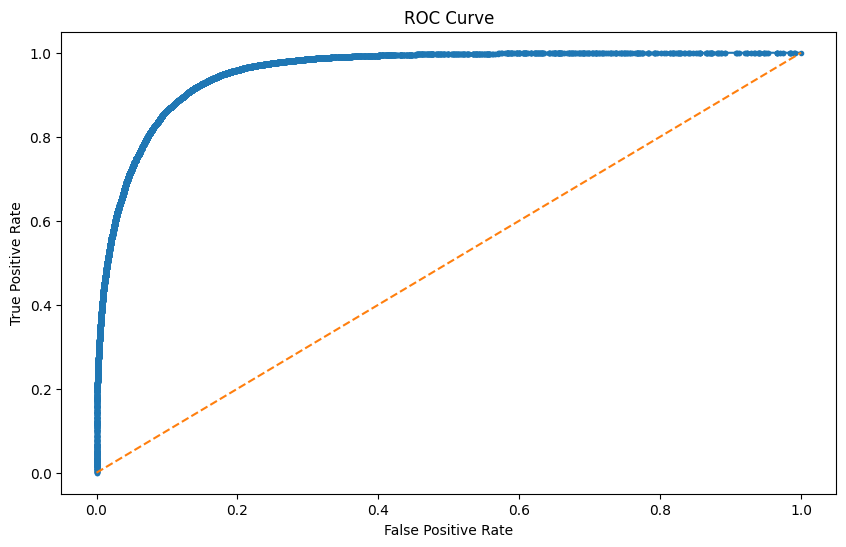

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_vtest, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
test['target']=estimator.predict(X_test)

In [66]:
test

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-10-12,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,...,NaN,NaN,0.005913,0.001250,0.006542,NaN,0.009163,0.003691,0.003220,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,2019-04-15,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,...,NaN,NaN,0.004345,0.000866,0.009117,NaN,0.002197,0.000247,0.007778,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,2019-10-16,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,...,NaN,NaN,1.000977,0.008896,0.895996,0.150146,1.009766,0.457764,0.092041,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,2019-04-22,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,...,NaN,NaN,1.007812,0.003754,0.919922,0.255371,1.007812,0.500977,0.182983,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,2019-10-22,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,...,NaN,NaN,0.006622,0.001140,0.009529,NaN,0.009407,0.001557,0.000525,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,2019-04-14,0.646973,0.003872,0.011307,0.816895,0.003811,0.162964,0.008942,0.028900,...,NaN,NaN,0.003016,0.006851,0.009308,NaN,0.009392,0.003279,0.005295,0
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,2019-10-19,0.471191,0.001856,0.084167,0.082520,0.508789,0.856934,0.000462,0.070496,...,NaN,NaN,0.007683,0.003374,0.009781,NaN,0.008110,0.005432,0.009979,1
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,2019-04-06,0.206421,0.001038,0.019958,1.003906,0.009598,0.321045,0.077759,0.014290,...,NaN,NaN,0.002304,0.001640,0.002371,NaN,0.008156,0.004848,0.002119,1
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,2019-04-08,0.570801,0.034210,0.049774,0.192871,0.002750,0.230835,0.001869,0.099915,...,NaN,NaN,0.005352,0.000086,0.003914,NaN,0.003855,0.007481,0.006962,0


In [67]:
X_test.to_feather('X_test.feather')